# VGG 16 with extra layers
# Accuracy: 
Training 86%  Validation 84% 
# Loss: 
Training 0.4118  Validation 0.5059

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

In [12]:
import os
import random
import numpy as np
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.models import model_from_json

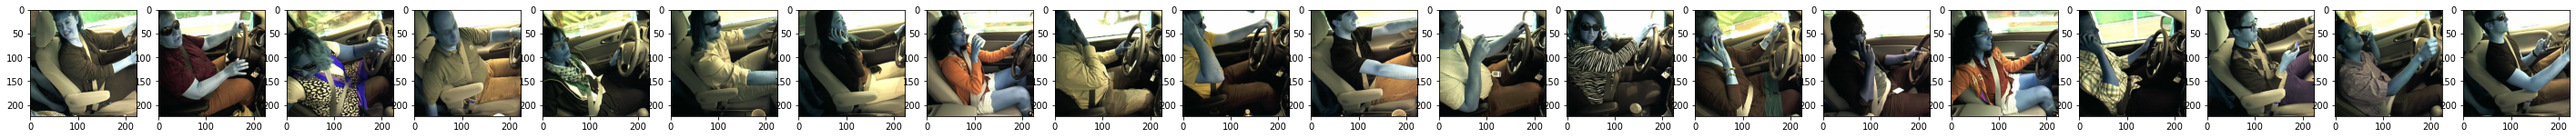

In [13]:
test_image = []
i = 0
fig, ax = plt.subplots(1, 20, figsize = (50,50 ))

files = os.listdir('../../statefarm_dataset/test')
nums = np.random.randint(low=1, high=len(files), size=20)
for i in range(20):
#     print ('Image number:',i)
    img = cv2.imread('../../statefarm_dataset/test/'+files[nums[i]])
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show


In [14]:

with open('model_vgg16_all_layers.json','r') as f:
    model = model_from_json(f.read())


# Compile CNN model
sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])
print(model.summary())



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096  

[7.0517140e-06 2.1268957e-11 1.2101271e-11 1.0572809e-11 1.3548809e-10
 4.8984643e-09 6.9798611e-12 1.8341987e-07 1.5569078e-05 9.9997711e-01]


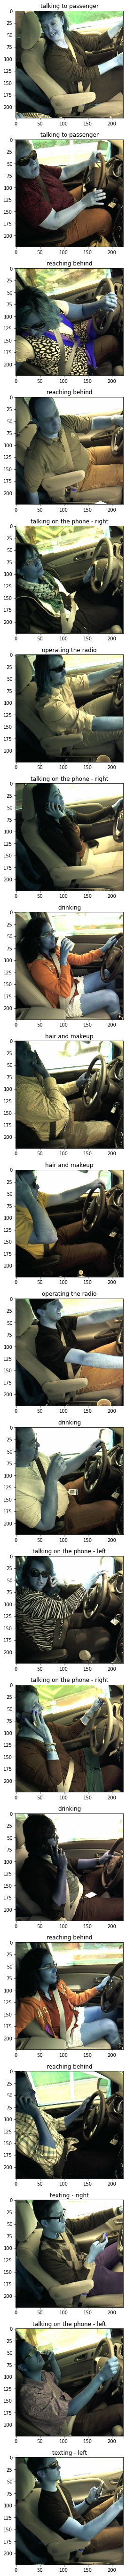

In [15]:
model.load_weights('model_vgg16_all_layers.h5')

test = []

for img in test_image:
    test.append(img)

predict_test = np.array(test).reshape(-1,224,224,3).astype('float32')
prediction = model.predict(predict_test)
print(prediction[0])

i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i])
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show
    

# MobileNet Model

# Accuracy:
Training 90% Validation 83%

# Loss:
Training 0.30 Validation 0.49

In [16]:
with open('mobilenet_sgd_nolayers.json','r') as f:
    mobile_model = model_from_json(f.read())


# Compile CNN model
sgd = optimizers.SGD(lr = 0.001)
mobile_model.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])
print(mobile_model.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

[5.3949364e-02 1.3800645e-08 7.3670008e-09 3.7311833e-07 2.1908625e-06
 8.8585314e-04 1.7493765e-08 1.0414767e-05 1.2859858e-03 9.4386578e-01]


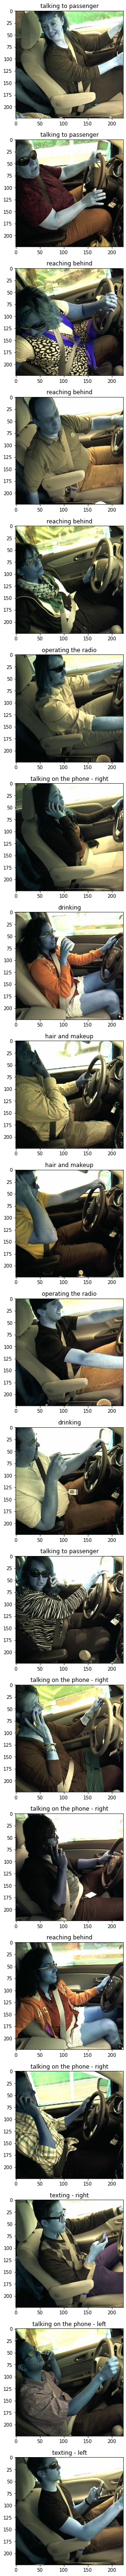

In [17]:
mobile_model.load_weights('mobilenet_sgd_nolayerss.h5')

test = []

for img in test_image:
    test.append(img)

predict_test = np.array(test).reshape(-1,224,224,3).astype('float32')
prediction = mobile_model.predict(predict_test)
print(prediction[0])

i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i])
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show
    